In [10]:
!pip install psycopg2-binary

     |████████████████████████████████| 1.5 MB 627 kB/s eta 0:00:01


In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from config import password
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# import the SQL database

conn=psycopg2.connect(host="localhost",port=5432,database="employee_db", user='postgres', password=password)
#engine = create_engine(f'postgresql//localhost:5432/employee_db')

In [3]:
cur = conn.cursor()

In [4]:
#Query the employee data
cur.execute("SELECT s.emp_no, s.salary, t.title FROM salaries as s JOIN employees as e on s.emp_no = e.emp_no JOIN titles as t on e.emp_title = t.title_id")
emp_query_results=cur.fetchall()
emp_query_results[0:5]

[(10005, 78228, 'Staff'),
 (10010, 72488, 'Engineer'),
 (10011, 42365, 'Staff'),
 (10018, 55881, 'Senior Engineer'),
 (10035, 41538, 'Senior Engineer')]

In [5]:
#Query the salaries data
# cur.execute("SELECT * FROM salaries")
# sal_query_results=cur.fetchall()
# sal_query_results[0:5]

In [6]:
#Query the titles data
# cur.execute("SELECT * FROM titles")
# emp_query_results=cur.fetchall()
# emp_query_results[0:5]

In [7]:
# emp_df = pd.DataFrame {
#     "emp_no": emp_query_results[0]
# }
emp_no=[]
salary=[]
title=[]
for row in emp_query_results:
    emp_no.append(row[0])
    salary.append(row[1])
    title.append(row[2])
    



In [8]:
#Put the query into a dataframe
salary_df = pd.DataFrame({
    "Employee No": emp_no,
    "Salary": salary,
    "Title": title
})

salary_df.head()

,Employee No,Salary,Title
0,10005,78228,Staff
1,10010,72488,Engineer
2,10011,42365,Staff
3,10018,55881,Senior Engineer
4,10035,41538,Senior Engineer


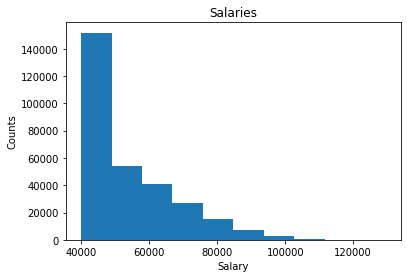

In [23]:
#Create histogram of Salaries
plt.hist(salary_df["Salary"])
#plt.xlabel("Salary")
plt.ylabel("Counts")
plt.xlabel("Salary")
plt.title("Salaries")

plt.savefig("Salary_histogram.png")

plt.show()

In [24]:
#Group by Title
title_groups = salary_df.groupby('Title')

title_salary = round(title_groups['Salary'].mean(),2)

title_salary

Title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Staff                 58465.38
Technique Leader      48582.90
Name: Salary, dtype: float64

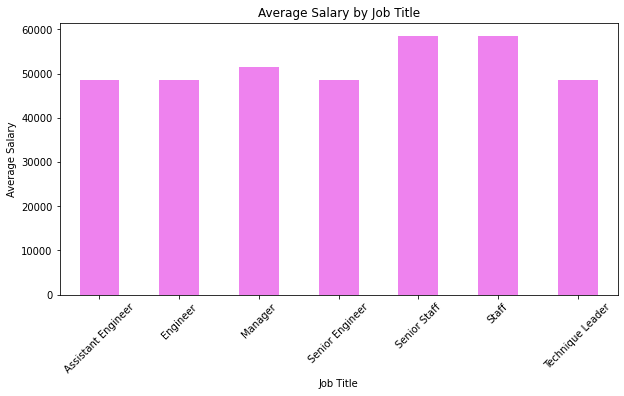

In [26]:
title_salary.plot(kind='bar',rot=45, figsize=(10,5), color='violet')
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.title("Average Salary by Job Title")

plt.savefig("Salary_by_Title_barchart.png")

plt.show()
